In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [69]:
N=100
dx=1/N
x=np.linspace(0,1,N+1)
%matplotlib inline

In [70]:
def mL2V(x):
    return 0*x

In [75]:
def she_1d(x):
    V=mL2V(x)
    plt.grid()
    plt.plot(x,V)
    d =  1/dx**2 + mL2V(x)[1:-1] #dont take the first and last point
    e =  (-0.5/(dx**2))*np.ones(len(d)-1)
    w,v = eigh_tridiagonal(d,e)
    
    plt.figure()
    plt.plot(v.T[0])
    plt.plot(v.T[1])
    plt.plot(v.T[2])
    plt.plot(v.T[3])
    plt.plot(v.T[4])
    plt.plot(v.T[5])
    plt.figure()
    plt.bar(np.arange(0, 10, 1), w[0:10])
    plt.ylabel('$mL^2 E/\hbar^2$')
    return w,v

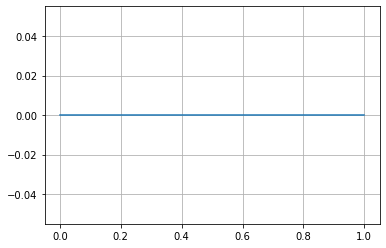

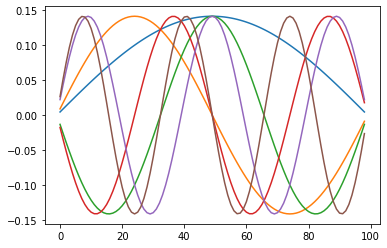

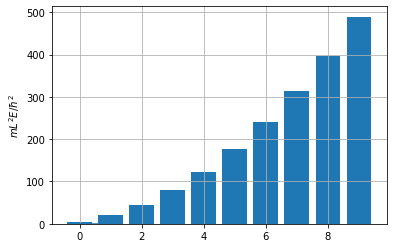

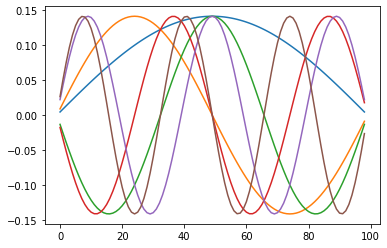

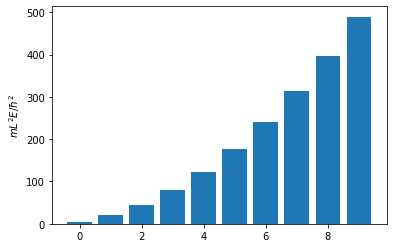

In [77]:
x1=np.linspace(0,1,N+1)
x2=np.linspace(0,1,N+1)
w1,v1= she_1d(x1)
w2,v2= she_1d(x2)

In [ ]:
#antisymmetrize eigenvectors: This is made by applying (𝜓(r1 , s1, r2 , s2) - 𝜓(r2 , s2, r1 , s1))/sqrt(2) to each state.
 

In [78]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
from scipy import sparse

In [79]:
N = 150
X1, X2 = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))

In [81]:
def get_potential(x,y):
    return 0*x
#def get_potential(x, y):
#    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential(X1,X2)

In [82]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [84]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

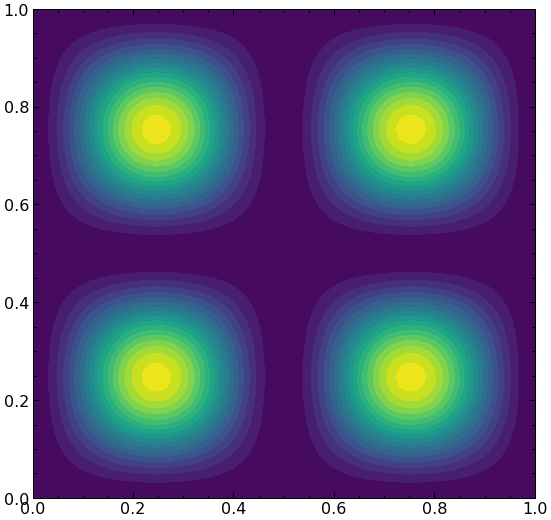

In [90]:
plt.figure(figsize=(9,9))
plt.contourf(X1, X2, get_e(3)**2, 20)

In [194]:
#for i in range(1):
i=2
a = (get_e(i) - get_e(i).swapaxes(0,1))/np.sqrt(2)

In [195]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i,j]<10**(-14):
            a[i,j]=0

In [196]:
a

array([[ 0.00000000e+00,  1.48334284e-08,  5.93016135e-08, ...,
         6.84505974e-05,  4.56749137e-05,  2.28498187e-05],
       [-1.48334284e-08,  0.00000000e+00,  7.41029530e-08, ...,
         1.36827092e-04,  9.13003968e-05,  4.56749137e-05],
       [-5.93016135e-08, -7.41029530e-08,  0.00000000e+00, ...,
         2.05055489e-04,  1.36827092e-04,  6.84505974e-05],
       ...,
       [-6.84505974e-05, -1.36827092e-04, -2.05055489e-04, ...,
         0.00000000e+00,  7.41029530e-08,  5.93016135e-08],
       [-4.56749137e-05, -9.13003968e-05, -1.36827092e-04, ...,
        -7.41029530e-08,  0.00000000e+00,  1.48334284e-08],
       [-2.28498187e-05, -4.56749137e-05, -6.84505974e-05, ...,
        -5.93016135e-08, -1.48334284e-08,  0.00000000e+00]])

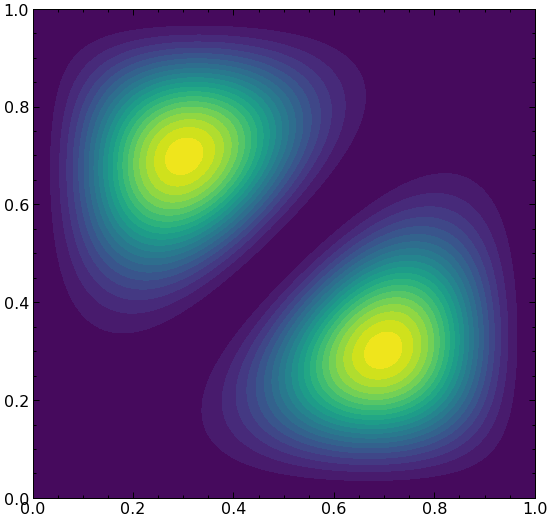

In [197]:
plt.figure(figsize=(9,9))
plt.contourf(X1, X2, a**2, 20)

In [111]:
get_e(0).shape

(150, 150)

In [117]:
eigenvectors.T[0].shape

(22500,)

In [120]:
np.max(V)

0.0

In [125]:
i=3
norm = np.sum(get_e(i)*get_e(i))

In [199]:
!pip install qmsolve

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=41d6791ece9d43c363de54ef5fd9ffbc4f27835a14a676ebd9bec3f97a02269f
  Stored in directory: /Users/pranavkairon/Library/Caches/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar


In [200]:
import numpy as np
from qmsolve import Hamiltonian, TwoFermions, init_visualization, Å


H = Hamiltonian(particles = TwoFermions(), 
				potential = None, # If None is specified, the particles are just limited by the limits of the grid which are infinite barriers
				spatial_ndim = 1, N = 100, extent = 10 * Å)


eigenstates = H.solve(max_states = 90)
print(eigenstates.energies)

visualization = init_visualization(eigenstates)

Computing...
Took 1.425144910812378
[ 1.84259923  3.68377245  4.78918935  6.25892077  7.36433768  9.2055109
  9.56555291 10.67096981 12.51214303 13.60046991 14.70588681 15.08729136
 16.54706003 18.35976824 19.12220836 19.46518515 21.30635837 22.42884049
 23.83884361 23.88150669 24.94426051 26.78543373 27.18813883 29.36058205
 30.03239534 31.13781224 31.22305583 32.66721419 32.97898546 35.55413379
 36.70213119 36.93443159 38.03984849 38.86076592 39.88102171 41.46142952
 42.45617003 42.89568292 44.53827507 45.64369197 45.76280217]


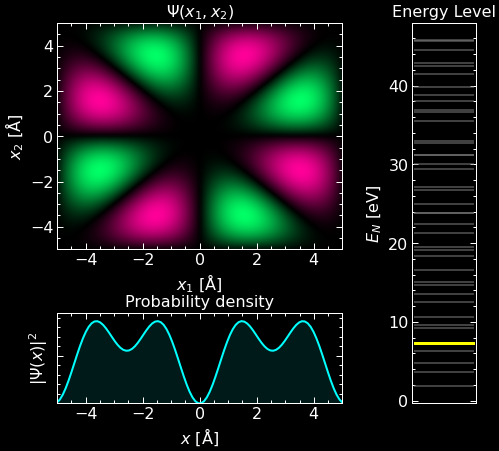

In [210]:
visualization.plot_eigenstate(4)